### Importing the needed liberaries

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# the dataset
df_train=pd.read_csv('../input/titanic/train.csv')


### (EDA) Eploratory Data Analysis

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 there are missing values in the columns Age and cabin columns
 
 
 for more investigations :


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

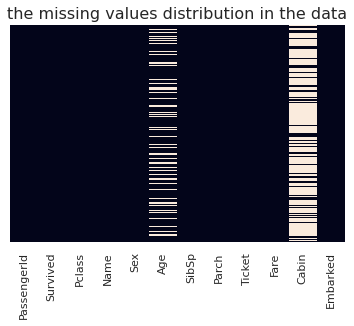

In [6]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

plt.title('the missing values distribution in the data',fontsize=16)
plt.show()

the data in the column cabin is very big so we will drop it
in the other hand the data in the column Age is small and will distributed in the data so we will try if we can fill it

### Data Cleaning

In [7]:
# droping the column cabin
df_witout_cabin=df_train.drop('Cabin',axis=1)

In [8]:
#cheking for the rest of the columns
df_witout_cabin.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

we will expolre the relation between Age column 
and the rest of the data inorder to fill it or deciding to drop it 

In [9]:
# we will count the percent of the missing values in order to know if the droping option is avliable for us
df_witout_cabin['Age'].isnull().sum()

177

In [10]:
len(df_witout_cabin['Age'])

891

In [11]:
percent_of_nulls=177*100/891

percent_of_nulls

19.865319865319865

the percent is greater than 5% so if we drop the null values in the Age column, then we will not be able to use it in our model unless we find a way to fillin the null values 

now we will explore the data;

<AxesSubplot:xlabel='Sex', ylabel='Age'>

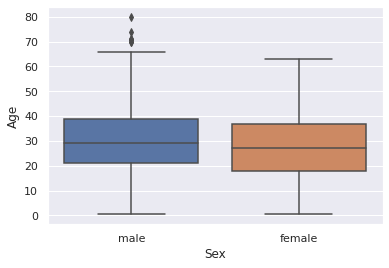

In [12]:
sns.boxplot(data=df_witout_cabin,y='Age',x='Sex')

thre is no relation between Age and SEX

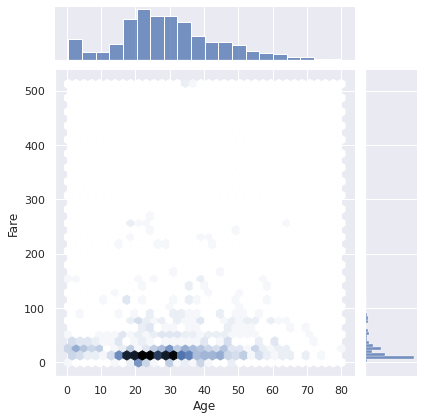

In [13]:
sns.jointplot(data=df_witout_cabin,x='Age',y='Fare',kind='hex')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

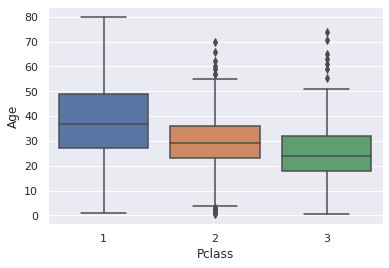

In [14]:
sns.boxplot(data=df_witout_cabin,y='Age',x='Pclass')

the figure shows that people with age around 38 tends to buy expensive ticket in the first class and people with age  around 29 tend to buy tickets in the second class however people with age around 24 tend to buy cheater tickets

**so**, we can fillin null values in the Age column by informations from pclass ****

In [15]:
def f(x):
    Age=x[0]
    Pclass=x[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
df_witout_cabin['Age']=df_witout_cabin[['Age','Pclass']].apply(f,axis=1)

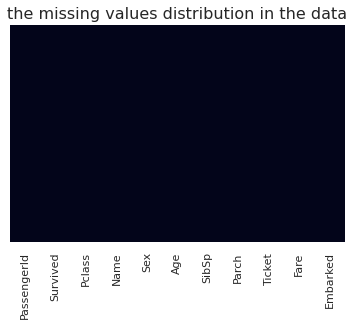

In [17]:
sns.heatmap(df_witout_cabin.isnull(),yticklabels=False,cbar=False)

plt.title('the missing values distribution in the data',fontsize=16)
plt.show()

In [18]:
df_witout_cabin.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [19]:
df_clean=df_witout_cabin.dropna()

In [20]:
df_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

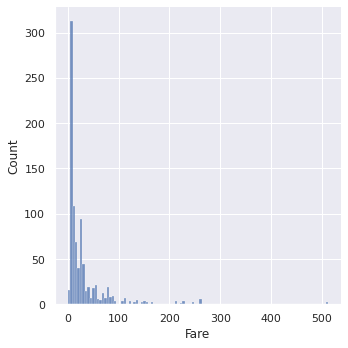

In [21]:
sns.displot(data=df_clean,x='Fare')

In [22]:
df_cleaned=df_clean[(df_clean['Fare']<200)]

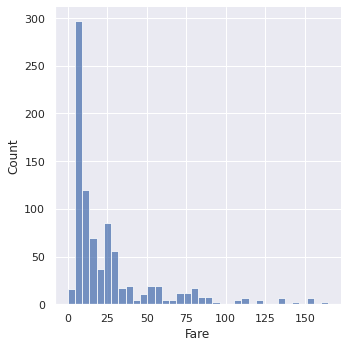

In [23]:
sns.displot(data=df_cleaned,x='Fare')

In [24]:
df_cleaned.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

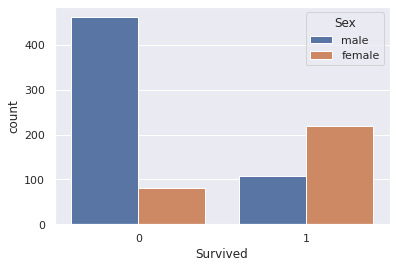

In [25]:
sns.countplot(data=df_cleaned,x='Survived',hue='Sex')

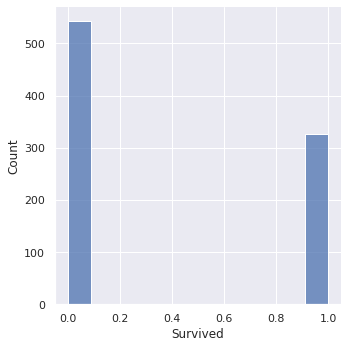

In [26]:
sns.displot(data=df_cleaned,x='Survived')

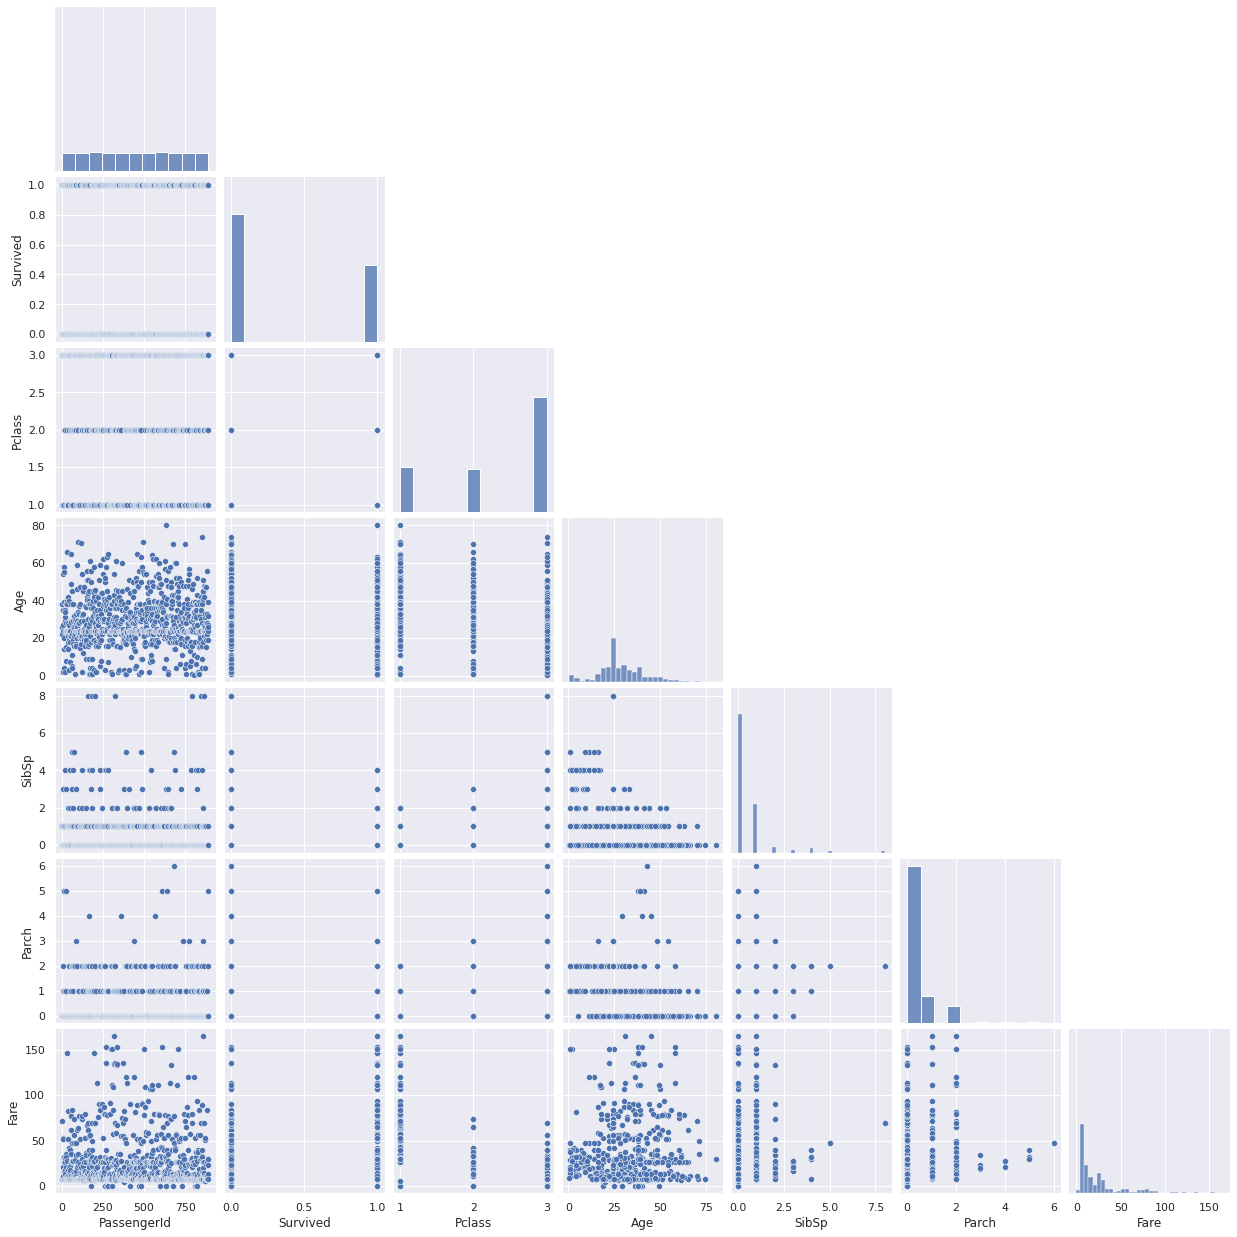

In [27]:
sns.pairplot(df_cleaned,corner=True)

In [28]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Data Preprocessing

In [29]:
df_needed=df_cleaned[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]
df_needed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
df_dummies=pd.get_dummies(df_needed,drop_first=True)

In [31]:
df_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [32]:
X_train=df_dummies.drop('Survived',axis=1)
y_train=df_dummies['Survived']

In [33]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [34]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Choosing The correct Featues For Our Model

In [35]:
import statsmodels.api as sm


from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [36]:
x=sm.add_constant(X_train)
model=sm.Logit(y_train,x)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.442218
         Iterations 6


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  869
Model:                          Logit   Df Residuals:                      860
Method:                           MLE   Df Model:                            8
Date:                Tue, 12 Oct 2021   Pseudo R-squ.:                  0.3316
Time:                        23:25:48   Log-Likelihood:                -384.29
converged:                       True   LL-Null:                       -574.96
Covariance Type:            nonrobust   LLR p-value:                 1.823e-77
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3636      0.663      8.094      0.000       4.065       6.662
Pclass        -1.1344      0.171     -6.616      0.000      -1.470      -0.798
Age           -0.0442      0.008     -5.316      0.000      -0.060      -0.028
SibSp         -0.3735      0.116     -3.229      0.001      -0.600      -0.147
Parch         -0.0786      0.123     -0.638      0.524      -0.320       0.163
Fare           0.0056      0.005      1.112      0.266      -0.004       0.015
Sex_male      -2.6715      0.204    -13.122      0.000      -3.071      -2.272
Embarked_Q    -0.1100      0.382     -0.288      0.773      -0.859       0.639
Embarked_S    -0.3902      0.241     -1.617      0.106      -0.863       0.083
==============================================================================
"""

the feature with p_value greater than 0.005 has no statsticaly scnificance and must be deleted according to the back_ward_elimination_rule  

but we will jut one feature at the step

In [37]:
X_=X_train.drop(X_train[['Embarked_Q','Embarked_S']],axis=1)


In [38]:
X_.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [39]:
x1=sm.add_constant(X_)
model=sm.Logit(y_train,x1)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.443961
         Iterations 6


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  869
Model:                          Logit   Df Residuals:                      862
Method:                           MLE   Df Model:                            6
Date:                Tue, 12 Oct 2021   Pseudo R-squ.:                  0.3290
Time:                        23:25:49   Log-Likelihood:                -385.80
converged:                       True   LL-Null:                       -574.96
Covariance Type:            nonrobust   LLR p-value:                 1.276e-78
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0448      0.630      8.005      0.000       3.810       6.280
Pclass        -1.1163      0.167     -6.665      0.000      -1.445      -0.788
Age           -0.0449      0.008     -5.404      0.000      -0.061      -0.029
SibSp         -0.3997      0.115     -3.469      0.001      -0.625      -0.174
Parch         -0.0946      0.122     -0.778      0.437      -0.333       0.144
Fare           0.0072      0.005      1.441      0.149      -0.003       0.017
Sex_male      -2.6976      0.202    -13.375      0.000      -3.093      -2.302
==============================================================================
"""

In [40]:
X_trial=X_.drop('Parch',axis=1)


In [41]:
x2=sm.add_constant(X_trial)
model=sm.Logit(y_train,x2)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.444313
         Iterations 6


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  869
Model:                          Logit   Df Residuals:                      863
Method:                           MLE   Df Model:                            5
Date:                Tue, 12 Oct 2021   Pseudo R-squ.:                  0.3285
Time:                        23:25:49   Log-Likelihood:                -386.11
converged:                       True   LL-Null:                       -574.96
Covariance Type:            nonrobust   LLR p-value:                 1.887e-79
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0679      0.630      8.049      0.000       3.834       6.302
Pclass        -1.1386      0.165     -6.893      0.000      -1.462      -0.815
Age           -0.0447      0.008     -5.391      0.000      -0.061      -0.028
SibSp         -0.4181      0.113     -3.695      0.000      -0.640      -0.196
Fare           0.0062      0.005      1.298      0.194      -0.003       0.016
Sex_male      -2.6673      0.197    -13.514      0.000      -3.054      -2.280
==============================================================================
"""

In [42]:
X_final=X_trial.drop('Fare',axis=1)


In [43]:
x3=sm.add_constant(X_final)
model=sm.Logit(y_train,x3)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.445317
         Iterations 6


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  869
Model:                          Logit   Df Residuals:                      864
Method:                           MLE   Df Model:                            4
Date:                Tue, 12 Oct 2021   Pseudo R-squ.:                  0.3269
Time:                        23:25:50   Log-Likelihood:                -386.98
converged:                       True   LL-Null:                       -574.96
Covariance Type:            nonrobust   LLR p-value:                 4.336e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5294      0.525     10.537      0.000       4.501       6.558
Pclass        -1.2726      0.131     -9.736      0.000      -1.529      -1.016
Age           -0.0450      0.008     -5.464      0.000      -0.061      -0.029
SibSp         -0.3666      0.105     -3.478      0.001      -0.573      -0.160
Sex_male      -2.6946      0.196    -13.726      0.000      -3.079      -2.310
==============================================================================
"""

### Building The model

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel=LogisticRegression()

In [46]:
logmodel.fit(X_final,y_train)

LogisticRegression()

### Preparing The test data before using it

In [47]:
df_test = pd.read_csv('../input/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [49]:
df_test['Age']=df_test[['Age','Pclass']].apply(f,axis=1)

In [50]:
df_test_needed=df_test[['Pclass', 'Sex', 'Age', 'SibSp']]
df_test_needed.head()

,Pclass,Sex,Age,SibSp
0,3,male,34.5,0
1,3,female,47.0,1
2,2,male,62.0,0
3,3,male,27.0,0
4,3,female,22.0,1


In [51]:
df_test_needed.describe()

,Pclass,Age,SibSp
count,418.000000,418.000000,418.000000
mean,2.265550,29.343301,0.447368
std,0.841838,12.917718,0.896760
min,1.000000,0.170000,0.000000
25%,1.000000,23.000000,0.000000
50%,3.000000,25.000000,0.000000
75%,3.000000,36.375000,1.000000
max,3.000000,76.000000,8.000000


In [52]:
x_test_dummies=pd.get_dummies(df_test_needed,drop_first=True)
x_test_dummies.head()

,Pclass,Age,SibSp,Sex_male
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1
3,3,27.0,0,1
4,3,22.0,1,0


### Getting the predictions

In [53]:
predictions=logmodel.predict(x_test_dummies)

In [54]:
pred=pd.DataFrame(predictions,columns=['pred'])
pred.head()

,pred
0,0
1,0
2,0
3,0
4,1


### Evaluating the predictions

In [55]:
sub = pd.read_csv('../input/titanic/gender_submission.csv')
sub_compare=sub.copy()
sub_compare['predictions']=predictions
#pd.set_option('display.max_rows', None)
sub_compare.tail(20)

,PassengerId,Survived,predictions
398,1290,0,0
399,1291,0,0
400,1292,1,1
401,1293,0,0
402,1294,1,1
403,1295,0,1
404,1296,0,0
405,1297,0,0
406,1298,0,0
407,1299,0,0


In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
sub_compare.columns

Index(['PassengerId', 'Survived', 'predictions'], dtype='object')

In [58]:
confusion_matrix(sub_compare['Survived'],pred)

array([[252,  14],
       [ 12, 140]])

In [59]:
final_result=pd.DataFrame(confusion_matrix(sub_compare['Survived'],pred),index=[['actual No','actual Yes']],columns=[['predicted No','predicted Yes']])
final_result

,predicted No,predicted Yes
actual No,252,14
actual Yes,12,140


In [60]:
classification_report(sub_compare['Survived'],pred)

'              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95       266\n           1       0.91      0.92      0.92       152\n\n    accuracy                           0.94       418\n   macro avg       0.93      0.93      0.93       418\nweighted avg       0.94      0.94      0.94       418\n'

### Final submition

In [61]:
Final_submition=sub_compare.drop('Survived',axis=1)
Final_submition.to_csv('my_submition',index=False)

### If you liked the notebook, please upvote for it!